![osu logo](./images/osu-32px-horiz.png)

<hr size="6" style="color:#d65828;background-color:#d65828;border:none;">

# Project: Deep Learning

This laboratory assignment was designed by Chaitanya Kulkarni and Raghu Machiraju.

**Due Date:** April 30, 2020, 23:59:59. No late submissions allowed unless the Night King from Game of Thrones arises again and invades our campus. Please consult the instructor if you are falling behind.

Some salient points:
* The total number of points is 300 (30% of total grade).
* The distribution for each part and question is listed below.
* Teams of two/three enrolled students will complete this project.
* Discussion across teams is only permitted on piazza.
* Teams are forbidden to exchange code.
* If any code is found and used, it should be mentioned in the notebook.
* Submission will be through Carmen and we will accept only Jupyter notebooks.
* It is required that the notebooks are zipped up and deposited.
* The zip file should be named in the following way lastname1-lastame2-labN. (1<=N<=4).
* Please please do not include the data with the .zip file.
* It is very important that the class follows the honor code of academic conduct to maximize learning in an open manner.


>### _Objective of this Lab:_
> * **(200 pts) Part 1** - Build an ANN: Realize a simple, L-layer artificial neural network with both forward and backward propagation. Understand how to train, visualize and evaluate the results of the network on the MNIST dataset.
>
> * **(100 pts) Part 2** - Build your best deep learning (DL) model: Learn to construct your own CNN architectures using Pytorch modules. Learn how to separate a validation set and use it to find the best set of hyperparameters and to also determine when to stop training any given deep learning or machine learning models. 

<hr size="6" style="color:#d65828;background-color:#d65828;border:none;">

# Part 1: Build an Artificial Neural Network 

Here you will build and train an ANN from scratch to predict the 10 class labels from N image points in a 784 dimensional space (note that each is image 28x28 or 784 pixels). Each pixel will take a value ranging from 0-255. Boilerplate starter code will be provided. As before you only have to fill in the empty code blocks. Additional details are provided within each function call and definitions. We breakdown the process into 4 steps which are also laid out in the starter code.

# Step 1: Build the HiddenLayer Class

Create a HiddenLayer class such that:
1. Stores the weights/ parameters for that layer;
2. Defines a forward function to update weights of the current layer at each step;
3. Support activation functions that also calculate respective gradients.


In [25]:
import numpy as np

class HiddenLayer:
    def __init__(self, weights_shape, bias=True, activation="sigmoid", last=False):
        """
        Defines a HiddenLayer that performs a linear transformation
        with the learnt weights. Supports a collection of activation functions.
        
        :param weights_shape: shape of the weights defined as (in_features, out_features).
        :param bias: whether or not to use the bias term in feed forward calculation.
        :param activation: activation function to use.
        """
        #code here
        
        self.weights_shape = weights_shape
        self.bias = bias
        self.activation = activation
        if last:
            self.activation = 'sigmoid'
        self.init_weights(weights_shape)
                
    def sigmoid(self, x, d=False):
        """
        The sigmoid activation function with support for derviatives. 
        """
        # code here
        
        s = 1/(1+np.exp(-x))
        
        if d:
            # return derivative of sigmoid
            return s*(1-s)
            
        # return sigmoid of x
        return s
    
    def tanh(self, x, d=False):
        """
        The tanh activation function with support for derviatives.
        """
        #code here
        
        t = np.tanh(x)
        
        if d:
            # return derivative of tanh
            return 1-np.power(t,2)
        
        # return tanh of x.
        return t
    
    # define more activation functions here (ReLU, linear, etc)
    
    
    def relu(self, x, d=False):
        r = np.maximum(0,x)
        if d:
            return np.where(x<=0, 0, 1)
        return r
    
            
    def init_weights(self, weights_shape):
        """
        Defines how to initialize the weights. Random or all zeros.
        :param weights_shape: the dimensions of the weight matrix to initialize.
        """
        # code here
        
        self.weights = np.random.randn(weights_shape[1], weights_shape[0]) / np.sqrt(weights_shape[0])
        if self.bias:
            self.b = np.random.randn(weights_shape[1], 1)
        
    
    def forward(self, X):
        """
        Implement the feed forward equation here. 
        Be sure to store the input and output as those will be 
        needed in back propogation part.
        
        :param X: Input of size (m, d), 
            where m is the batch size, and d is the input feature dim 
            coming from the previous layer.
        """
        self.X = X
        self.out = self.weights.dot(X)
        # calculate feed forward for the given layer.
        if self.bias:
            self.out += self.b
        return self.out

# Step 2: Build the Network with Back Propagation 

Use **_Mean Squared Error_** as your loss/cost function. For bonus points implement the **_Cross Entropy_** *as another candidate for a loss function.* 

To support back propogation, revisit the following puesdo code:

> #### &emsp;For every mini-batch $X$ of size $m$:
>
> &emsp;&emsp;1. Generate the Output error $\delta_L$ of shape $(m, L)$:
>    
> &emsp;&emsp;&emsp;&emsp;$\delta_L = \Delta \odot \sigma^\prime_L(z_L)$
>    
> &emsp;&emsp;2. For every remaining layers $(L - 1, L - 2, ... 1)$ calculate $\delta_l$ of shape $(m, l)$:
>    
> &emsp;&emsp;&emsp;&emsp;$\delta_l = (w_{l+1} \cdot \delta_{l+1}) \odot \sigma^\prime_l(z_l)$
>    
> &emsp;&emsp;3. Perform gradient descent by updating the weights and bias of all the layers:
>    
> &emsp;&emsp;&emsp;&emsp;$w_l \rightarrow w_l - \frac{\eta}{m} \sum_{x}\delta_{x,l}a_{x,l-1}^T$
>    
> &emsp;&emsp;&emsp;&emsp;$b_l \rightarrow b_l - \frac{\eta}{m} \sum_{x}\delta_{x,l}$

Where,

$m$ - Batch size

$x, X$ - are a single sample and a batch of samples respectively

$\Delta$ - Is the cost function's derivative

$\odot$ - [Hadamard Product](https://en.wikipedia.org/wiki/Hadamard_product_(matrices)) which realizes element-wise matrix multiplication (see below for illustration)

$L$ - Is the last layer

$\eta$ - learning rate

$\sigma$ - activation function

$a, z, b, w$ - are defined by the given layer $l$'s feed forward equation: $z_{l+1} = w_{l+1} \cdot a_l + b_{l+1}$ 

The Hadamard product operates on identically shaped matrices and produces a third matrix of the same dimensions. 

<img style="float: left;" src=https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Hadamard_product_qtl1.svg/1200px-Hadamard_product_qtl1.svg.png width="400">


    

In [26]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score
class ANN:
    def __init__(self, arch, lr, input_shape):
        """
        Build the ANN network based on the architecture specified.
        
        
        :param arch: `arch` is a list of values specifying the number 
            of nodes in each hidden layer. 
            ie arch = [200, 100, 10] will create a 3-layer network with the 
            first layer containing 200 nodes, second 100, and the final 10.
        :param lr: the learning rate
        :input_shape: A tuple that contains the expected input shape. 
        """
        self.input_shape = input_shape
        self.layers = []
        arch.insert(0, input_shape[1])
        self.lr = lr
        self.arch = arch
        self.build(arch)
        self.live_plotter = LivePlotter('Live Plotter', plot_every_n_sec=1)
            
    def build(self, arch):
        """
        Builds the network arch and store the hidden layers in self.layers.
        
        :param arch: specify the number of nodes in each hidden 
            layer as a list where the length is the number of layers.
            
        :return : none
        """
        for i in range(0, len(arch)-1):
            # code here
            if i == len(arch)-1:
                layer = HiddenLayer((arch[i], arch[i+1]), last=True)
                break
            layer = HiddenLayer((arch[i], arch[i+1])) # build hidden layer here
            self.layers.append(layer)
        
    def forward(self, X):
        """
        Run the input through each layer's forward implementation.
        Return the final layer's output.
        
        :param X: Input as a matrix of size (m, 784)
        
        :return out: final layers output
        """
        # code here
        
        for layer in self.layers:
            X = layer.forward(X)
            
            if layer.activation == 'relu':
                X = layer.relu(X)
            elif layer.activation == 'tanh':
                X = layer.tanh(X)
            else:
                X = layer.sigmoid(X)
                
        return X
    
    def backward(self, y):
        """
        Implement the back propogation algorithm here. Make use of 
        each layer's stored input's and outputs to update each layer's weights and biases.
        
        :param y: target labels as a matrix of size (m, 10).
        
        :return : none
        """
        
        # code here
        m = y.shape[0]
        dblist = []
        dwlist = []
        
        y = self.cross_ent(self.layers[-1].sigmoid(self.layers[-1].out), y, d=True)      
        
        dwlist.insert(0, (1/m)*y.dot(self.layers[-1].X.T))
        dblist.insert(0, (1/m)*np.sum(y, axis=1))
        
        
        for i in range(len(self.arch)-2, 0, -1):
            inmd = self.layers[i].weights.T.dot(y)
                      
            if self.layers[i-1].activation == 'relu':
                a = self.layers[i-1].relu(self.layers[i-1].out, d=True)
            elif self.layers[i-1].activation == 'tanh':
                a = self.layers[i-1].tanh(self.layers[i-1].out, d=True)
            else:
                a = self.layers[i-1].sigmoid(self.layers[i-1].out, d=True)
            
            y = np.multiply(inmd , a)

            dwlist.insert(0, (1/m)*y.dot(self.layers[i-1].X.T))
                                  
            dblist.insert(0, (1/m)*np.sum(y, axis=1))
              
        for i in range(0, len(dwlist)):
            self.layers[i].weights -= (self.lr * dwlist[i])
            self.layers[i].b -= (self.lr * dblist[i]).reshape(self.layers[i].b.shape)
        
        
            
    def mse(self, y_pred, y, d=False):
        """
        Calculate the loss/cost function. Also define its derivative.
        :param y_pred: last layer's output after feed forward. Matrix of size (m, 10)
        :param y: target labels as a matrix of size (m, 10)
        
        :return mse: return either the cost function, or its derivative.
        """
        
        # code here
        
        mse = np.mean(np.power(y - y_pred, 2))
        
        if d:
            return y_pred-y
        
        return mse
    
    
    
    def mse(self, y_pred, y, d=False):
        """
        Calculate the loss/cost function. Also define its derivative.
        :param y_pred: last layer's output after feed forward. Matrix of size (m, 10)
        :param y: target labels as a matrix of size (m, 10)
        
        :return mse: return either the cost function, or its derivative.
        """
        
        # code here
        
        mse = np.mean(np.power(y - y_pred, 2))
        
        if d:
            return y_pred-y
        
        return mse
        
    
    def cross_ent(self, y_pred, y, d=False):
      
        cost = (-1*y*np.log(y_pred+1e-9))-(1-y)*(np.log(1-y_pred+1e-9))
    
        cost = np.average(cost)
    
        if d:
            return y_pred-y
    
        return cost
    
    
    def train(self, train_loader):
        """
        Train the model.
        :param train_loader: an iterator that generates mini-batches for train data
        
        :return all_loss: a list of loss values per mini-batch. (to plot)
        """
        all_loss = []
        for X, y in train_loader:
            # code here
            y_pred = self.forward(X.T)
            c = self.cross_ent(y_pred.T, y)
            all_loss.append(c)
            self.backward(y.T)
            self.live_plotter.update_step(1)
            self.live_plotter.update('train_loss', c)
            
        #print('training epoch loss: ' +  str(np.mean(all_loss)))
        return all_loss
    
    def test(self, test_loader):
        """
        Test the model. 
        You can also return the accuracy scores here to see 
        if the model is training over each epoch.
        
        :param test_loader: an iterator that generates mini-batches for test data
        
        :return all_loss: a list of loss values per mini-batch. (to plot)
        :return acc: accuracy score for the full 10k test dataset. (to plot)
        """
        total = 0
        loss = []
        corr = []
        pred = []
        
        
        for X, y in test_loader:
            # code here
            y_pred = self.forward(X.T)
            c = self.cross_ent(y_pred.T, y)
            loss.append(c)
            ind = np.argmax(y_pred.T, axis=1)
            #self.live_plotter.update_step(len(X))
            #self.live_plotter.update('test_loss', c)
            
            for i in range(0, len(ind)):
                before = np.zeros(ind[i], dtype=np.int)
                after = np.zeros(9-ind[i], dtype=np.int)
                temp = np.append(np.array(1, dtype=np.int), after)
                temp = np.append(before, temp)
                pred.append(temp)
            corr.extend(y)
        
        acc = accuracy_score(corr, pred)
        #print('epoch accuracy: ' + str(acc))
        self.live_plotter.update_step(64)
        self.live_plotter.update('test_acc', acc)
        return [loss, acc, corr, pred]

    

# Step 3: Train on MNIST Dataset

Find the MNIST PreProcessed Dataset at  https://www.kaggle.com/oddrationale/mnist-in-csv. 

We shall use the `mnist_train.csv` (60k) for training, and `mnist_test.csv` (10k) for testing.


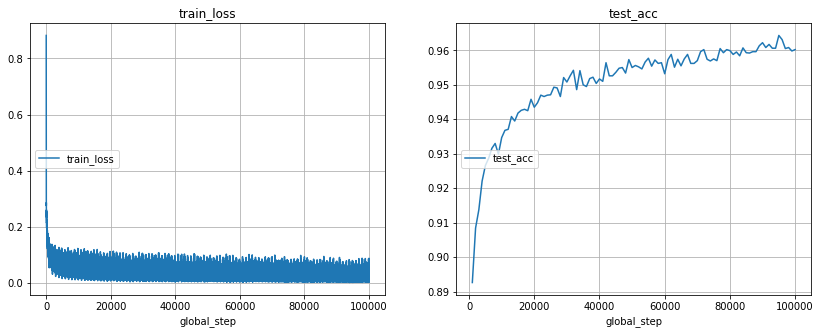

In [19]:
import pandas as pd
import numpy as np

train_df = pd.read_csv("data/mnist_train.csv")
train_y = train_df['label'].to_numpy()
train_X = train_df.iloc[:, 1:].to_numpy()

test_df = pd.read_csv("data/mnist_test.csv")
test_y = test_df['label'].to_numpy()
test_X = test_df.iloc[:, 1:].to_numpy()

def get_batch(df, n=64):
    y = pd.get_dummies(df['label']).to_numpy()
    X = df.iloc[:, 1:].to_numpy()

    for i in range(X.shape[0] // n):
        yield X[n*i:n*(i+1)], y[n*i:n*(i+1)]


BATCH_SIZE = 64
NB_EPOCHS = 100
# example ANN
net = ANN([100, 10], lr=0.002, input_shape=(BATCH_SIZE, train_X.shape[1]))

# train and test the model over multiple epoch.
for i in range(NB_EPOCHS):
    train_loader = get_batch(train_df, n=BATCH_SIZE)
    test_loader = get_batch(test_df, n=BATCH_SIZE)
    train_loss = net.train(train_loader)
    test_loss = net.test(test_loader)

# Step 4: Evaluate ANN

* Generate confusion matrix, and accuracy score for the test set
* Update the ANN class to generate live plots of loss function as the model trains. Use `LivePlotter` provided below.
* Now experiment with the following hyper parameters and report your results.
    * Network Architecture (number of layers, number of nodes in each layer, weight initializations, etc)
    * Batch size
    * Learning rate
    * (Bonus) Try **_Cross Entropy_** cost function and compare against **_Mean Squared Error_**.
* Report your observations. Which set of hyper parameters worked the best. Why ?


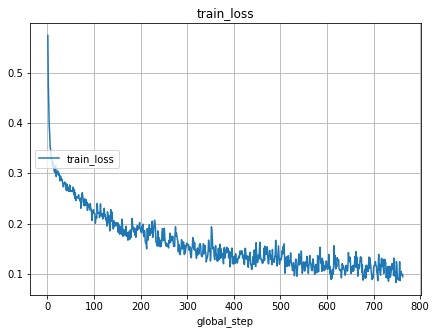

test accuracy is: 0.8901241987179487
[[[8917   88]
  [  35  944]]

 [[8778   73]
  [  20 1113]]

 [[8870   84]
  [ 155  875]]

 [[8831  145]
  [ 115  893]]

 [[8833  171]
  [  52  928]]

 [[8971  123]
  [ 190  700]]

 [[8918  110]
  [  50  906]]

 [[8882   75]
  [ 123  904]]

 [[8913   98]
  [ 209  764]]

 [[8846  130]
  [ 148  860]]]


In [20]:
# code here
from sklearn.metrics import multilabel_confusion_matrix

net = ANN([100, 10], lr=0.002, input_shape=(BATCH_SIZE, train_X.shape[1]))
#arch = [300, 100, 10] with corss entropy and sigmoid activations works well. But the torch CNN is better!
NB_EPOCHS = 1
for i in range(NB_EPOCHS):
    train_loader = get_batch(train_df, n=BATCH_SIZE)
    test_loader = get_batch(test_df, n=BATCH_SIZE)
    train_loss = net.train(train_loader)
    test_loss = net.test(test_loader)
print('test accuracy is: ' + str(test_loss[1]))

print(str(multilabel_confusion_matrix(test_loss[2],test_loss[3])))

<hr size="6" style="color:#d65828;background-color:#d65828;border:none;">

# Part 2: Build the Best Model for MNIST

n this part, you can construct your **own Convolutional Neural Network (CNN) model** using [Pytorch](https://pytorch.org/) modules and experiment with different types of deep learning models you may find in literature (see below), or that you conceived on your own. It is **important** to reference any papers/books you used to realize or develop your models. 


Otherwise, you are also free to modify the provided CNN architecture which is described below. Separate a validation set for the MNIST data and use it to find the best set of hyperparameters and determine when to stop training. 


## Step 1: Build the Model

A standard 2-layer CNN architecture is provided . Experiment with different types of models you may find in literature, or that you conceived on your own. 

In [27]:
import torch.nn as nn
import torch.optim as opt
import torch

class Net(nn.Module):
    def __init__(self, dropout, activation, stop, lr):
        super(Net, self).__init__()
        self.lr = lr
        self.activation = activation
        self.stop = stop
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(dropout)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        
        if self.activation == 'relu':
            x = F.relu(x)
        elif self.activation == 'tanh':
            x = F.tanh(x)
        else:
            x = F.sigmoid(x)
        
        x = self.conv2(x)
        
        if self.activation == 'relu':
            x = F.relu(x)
        elif self.activation == 'tanh':
            x = F.tanh(x)
        else:
            x = F.sigmoid(x)
        
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        
        if self.activation == 'relu':
            x = F.relu(x)
        elif self.activation == 'tanh':
            x = F.tanh(x)
        else:
            x = F.sigmoid(x)
        
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        #return outputnetwork = Net()
        return output

## (Optional) Live Plotting

This class will allow you to display plots as you are training the model. By default it is set to update plots every 20 sec. You are free to make any modifications to this class if you need additional support to display other than just line plots.

In [28]:
%matplotlib inline

from collections import defaultdict
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt
class LivePlotter:
    def __init__(self, title='', plot_every_n_sec=10):
        self.data_dict = defaultdict(list)
        self.global_step = 0
        self.plot_every_n_sec = plot_every_n_sec
        self.start_time = time.time()
        self.figsize = (7, 5)
        self.title = title
        self.plot_idx = {}
        self.fig = None
        
    def update_step(self, step):
        """
        increment global step by `step`.
        """
        self.global_step += step
        
    def update(self, data_type, y):
        """
        Add a datapoint and plot periodically. 
        Datapoint is added to the data dictionary given the key in `data_type`.
        :param data_type:
        :param y: datapoint to plot
        """
        self.data_dict[data_type].append((self.global_step, y))
        
        # plot periodically
        if time.time() - self.start_time > self.plot_every_n_sec:
            self.plot()
            self.start_time = time.time()
    
    def plot(self):
        if self.fig:
            clear_output(wait=True)
            
        for label, data in self.data_dict.items():
            if label not in self.plot_idx:
                self.plot_idx[label] = len(self.plot_idx) + 1
       
        self.fig = plt.figure(figsize=(7*len(self.plot_idx), 5))
        
        for label, data in self.data_dict.items():    
            axs = plt.subplot(1, len(self.plot_idx), self.plot_idx[label])
            x, y = zip(*data)
            axs.plot(x, y, label=label)
        
            plt.title(label)
            plt.grid(True)
            plt.xlabel('global_step')
            plt.legend(loc='center left') 
        plt.show()

## Step 2: Implement early stopping

Implement end stopping using the validation set. Your model should stop training if you do not observe any improvement on the validation set. Set `early_stopping` as one of the hyperparameters.

In [29]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from tqdm import tqdm

# if you have an nvidia gpu you can improve your run speeds, 
# otherwise its not necessary for this project.
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")


class TrainingFramework:
    def __init__(self, train_loader, test_loader, dev_loader, live_plotter=None, max_epochs=100, lr=0.2):
        """
        Initialize training framework with the model, optimizer, the data loaders and
        all the relevant hyperparameters. 
        
        :param train_loader: DataLoader for training dataset
        :param test_loader: DataLoader for test dataset
        :param live_plotter: LivePlotter instance to be used to update plots over training/testing
        :param max_epochs: max number of epochs to train
        :param lr: learning rate
        """
        self.model = Net(0.25, 'relu', 20, 0.002).to(device)
        self.optimizer = optim.Adadelta(self.model.parameters(), lr=lr)
        self.max_epochs = max_epochs
        self.train_loader = train_loader
        self.test_loader = test_loader
        self.dev_loader = dev_loader
        if live_plotter is None:
            self.live_plotter = LivePlotter("Plottn' Live", plot_every_n_sec=30)
        else:
            self.live_plotter = live_plotter
            
        self.dev_acc = []

    def train(self, epoch):
        """
        Core training function. Performs a single training session in one epoch.
        Leave unmodified.
        
        :param epoch: current epoch number
        """
        self.model.train()
        for batch_idx, (X, y) in enumerate(tqdm(self.train_loader, desc="Training")):
            X, y = X.to(device), y.to(device)
            self.optimizer.zero_grad()
            
            loss = self.train_batch(batch_idx, (X, y))
            
            loss.backward()
            self.optimizer.step()
            # collect relevant datapoints to plot
            self.live_plotter.update_step(len(X))
            self.live_plotter.update('train_loss', loss.item())

    def test(self, epoch):
        """
        Core testing function. Performs a single testing session in one epoch.
        Leave unmodified.
        
        :param epoch: current epoch number
        """
        self.model.eval()
        test_loss = 0
        correct = 0
        with torch.no_grad():
            for batch_idx, (X, y) in enumerate(tqdm(self.test_loader, desc="Testing")):
                X, y = X.to(device), y.to(device)
                
                loss, pred = self.test_batch(batch_idx, (X, y))
                
                test_loss += loss
                correct += pred.eq(y.view_as(pred)).sum().item()
                
        test_loss /= len(self.test_loader.dataset)

        # collect relevant datapoints to plot
        self.live_plotter.update_step(len(self.test_loader.dataset))
        self.live_plotter.update(data_type='test_loss', y=loss)
        self.live_plotter.update(data_type='test_acc', 
                                 y=correct/len(test_loader.dataset))
        
    def dev(self):
        """
        Implement core validation function.
        """
        # code here
        self.model.eval()
        dev_loss = 0
        correct = 0
        with torch.no_grad():
            for batch_idx, (X, y) in enumerate(tqdm(self.dev_loader, desc="Developing?")):
                X, y = X.to(device), y.to(device)
                
                loss, pred = self.dev_batch(batch_idx, (X, y))
                
                dev_loss += loss
                correct += pred.eq(y.view_as(pred)).sum().item()
                
        dev_loss /= len(self.dev_loader.dataset)
        self.dev_acc.append(correct/len(dev_loader.dataset))
        # collect relevant datapoints to plot
        self.live_plotter.update_step(len(self.dev_loader.dataset))
        self.live_plotter.update(data_type='dev_loss', y=loss)
        self.live_plotter.update(data_type='dev_acc', 
                                 y=correct/len(dev_loader.dataset))
        
    def train_batch(self, batch_idx, batch):
        """
        Train a single batch.
        
        :param batch_idx: current batch index within a given epoch
        :param batch: a tuple containing X and y for a single batch
        """
        X, y = batch
        # code here
        output = self.model(X)
        loss = F.nll_loss(output, y)
        return loss
    
    def test_batch(self, batch_idx, batch):
        """
        Test a single batch
        
        :param batch_idx: current batch index within a given epoch
        :param batch: a tuple containing X and y for a single batch
        """
        X, y = batch
        # code here
        output = self.model(X)
        test_loss = F.nll_loss(output, y, reduction='sum').item()  # sum up batch loss
        pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
        
        return test_loss, pred
    
    def dev_batch(self, batch_idx, batch):
        """
        Implement a function to process a single batch in dev set.
        
        :param batch_idx: current batch index within a given epoch
        :param batch: a tuple containing X and y for a single batch
        """
        # code here
        X, y = batch
        output = self.model(X)
        dev_loss = F.nll_loss(output, y, reduction='sum').item()  # sum up batch loss
        pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
        
        return dev_loss, pred
        
    def run(self):
        """
        Performs one training and testing session over every epoch 
        until self.max_epochs.
        """
        
        # implement early stopping using dev set here.
        for epoch in range(self.max_epochs):
            self.train(epoch)
            self.dev()
            if epoch >= 2:
                if self.dev_acc[-1] < self.dev_acc[-2] or epoch == self.stop:
                    print('Stopping early !')
                    return
                self.test(epoch)
            
    def predict(self, X):
        """
        Generate predicted labels for the given input data in X.
        
        :param X: input data
        
        :return pred: return predicted labels as a tensor 1d array.
        """
        # code here
        output = model(X)
        pred = output.argmax(dim=1, keepdim=True)
        return pred

## Run training and testing sessions here

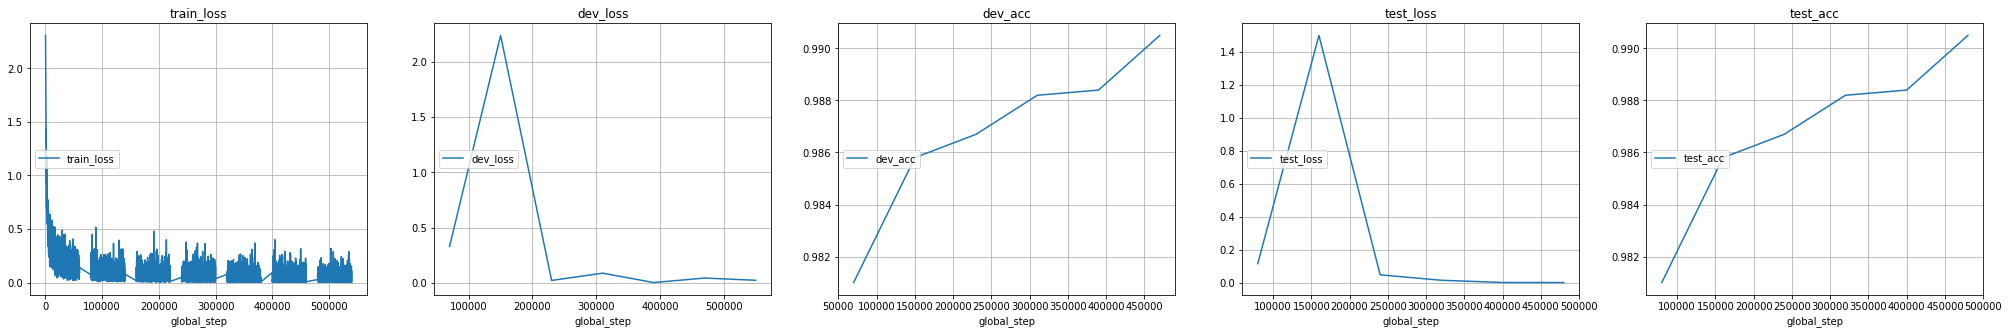

Stopping early !


In [24]:
%matplotlib inline

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

mean = 0.1307 # calculate the global mean of MNIST images
std = 0.3081 # calculate the global std of MNIST images

train_dataset = datasets.MNIST(
    '../data', 
    train=True, 
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((mean,), (std,))
    ])
)
test_dataset = datasets.MNIST(
    '../data', 
    train=False, 
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((mean,), (std,))
    ])
)

dev_dataset = datasets.MNIST(
    '../data', 
    train=False, 
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((mean,), (std,))
    ])
)


train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=64, 
    shuffle=True, 
    **kwargs
)

dev_loader = torch.utils.data.DataLoader(
    dev_dataset,
    batch_size=64, 
    shuffle=True, 
    **kwargs
)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=64, 
    shuffle=True, 
    **kwargs
)

tf = TrainingFramework(train_loader,
                       test_loader,
                       dev_loader,
                       live_plotter=LivePlotter("Plottn' Live", 
                                                plot_every_n_sec=1),
                       max_epochs=100,
                       lr=0.2)

# start the training.
tf.run()

## Step 3: Pick hyperparameter values for grid search.

Make use of code already demonstrated in the starter code to extend the pipeline to now evaluate hyperparameters using validation set. Separate random 10k samples from the training set for the validation set. Use the following hyperparameters for your model. Pick any 3 values for each.

* **Learning rate** (e.g., 0.2, 0.02, 0.002) 
* **Early stopping** (e.g., 2, 10, 20 epochs) 
* **Activation function** (e.g., ReLU, sigmoid, tanh, linear, Leaky ReLU) 
* **Any model hyperparameter** - Pick any model related hyperparameter from this list : number of convolution layers, changes to the convolution architecture, dropout rate, number of linear layers, different pooling strategies etc.



In [ ]:
lr  = [0.2, 0.02, 0.002]
es = [2, 10, 20]
activation = ['relu', 'sigmoid', 'tanh']
drop1 = [0.1, 0.25, 0.5]

grid = [lr, es, activation, drop1]

## Step 4: Evaluate all model variations

Perform a simple grid search using any 3 values for each of the hyperparameters. You should be exploring 12 (4x3) variations of your model against the validation set.

* Evaluate these 12 different models based on accuracy and report the best model.
* Plot all 12 accuracy curves (against the validation set over training epochs) in one image, what do you observe ?
* Pick the best model. Report which set of hyperparameters worked the best.

In [ ]:
# code here

# Resources

Please find sources that provide description of various CNNs and other networks
1. https://en.wikipedia.org/wiki/Convolutional_neural_network
2. https://towardsdatascience.com/illustrated-10-cnn-architectures-95d78ace614d
3. https://medium.com/datadriveninvestor/five-powerful-cnn-architectures-b939c9ddd57b
4. Neural network playground : https://playground.tensorflow.org/
5. Alexnet : http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf
6. ResNet: https://arxiv.org/abs/1512.03385
7. InceptionNet-v3: https://arxiv.org/abs/1512.00567


<hr size="6" style="color:#d65828;background-color:#d65828;border:none;">